# Part I - (Prosper Loan Data Exploration )
## by (Raghad Salem)

## Introduction
> This document explores a data set from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower interest rate, current loan status, borrower income, and many others. 

## Preliminary Wrangling

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in our dataset

In [40]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [41]:
print(loan_data.shape)
print(loan_data.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [42]:
type(loan_data['CreditGrade'][0]),type(loan_data['LoanStatus'][0]),type(loan_data['EmploymentStatus'][0]),type(loan_data['Occupation'][0]),type(loan_data['BorrowerState'][0])

(str, str, str, str, str)

### What is the structure of your dataset?

> This dataset contains 113,937 rows and 81 columns, most data are in string objects or int type and a few columns are in float type.


### What is/are the main feature(s) of interest in your dataset?

> i'm mostly interested in figuring out what factors predict the loan's outcome status.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The factors that may have an influence on the loan's outcome status are:
><ol>
   <li>Term: The length of the loan expressed in months.</li>
    <li>LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.</li>
    <li>BorrowerRate: The Borrower's interest rate for this loan.</li>
    <li>ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.</li>
    <li>EmploymentStatus: The employment status of the borrower.</li>
    <li>OpenCreditLines: Number of open credit lines.</li>
    <li>IncomeRange: The income range of the borrower.</li>
    <li>TotalProsperPaymentsBilled: Number of on time payments the borrower made on Prosper loans</li>
    <li>LoanOriginalAmount: The origination amount of the loan.</li>
    <li>MonthlyLoanPayment: The scheduled monthly loan payment.</li>

</ol>

**I'll start with dropping unnecessary columns and modifying some data types.**

In [43]:
#Drop unnecessary columns
loan_data2 = loan_data.loc[:,['ListingNumber','Term','LoanStatus','BorrowerAPR','BorrowerRate' ,'ProsperScore','EmploymentStatus','OpenCreditLines','IncomeRange','TotalProsperPaymentsBilled','LoanOriginalAmount' , 'MonthlyLoanPayment']]
loan_data2.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatus,OpenCreditLines,IncomeRange,TotalProsperPaymentsBilled,LoanOriginalAmount,MonthlyLoanPayment
0,193129,36,Completed,0.16516,0.1580,NaN,Self-employed,4.0,"$25,000-49,999",NaN,9425,330.43
1,1209647,36,Current,0.12016,0.0920,7.0,Employed,14.0,"$50,000-74,999",NaN,10000,318.93
2,81716,36,Completed,0.28269,0.2750,NaN,Not available,NaN,Not displayed,NaN,3001,123.32
3,658116,36,Current,0.12528,0.0974,9.0,Employed,5.0,"$25,000-49,999",NaN,10000,321.45
4,909464,36,Current,0.24614,0.2085,4.0,Employed,19.0,"$100,000+",11.0,15000,563.97


In [44]:
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               113937 non-null  int64  
 1   Term                        113937 non-null  int64  
 2   LoanStatus                  113937 non-null  object 
 3   BorrowerAPR                 113912 non-null  float64
 4   BorrowerRate                113937 non-null  float64
 5   ProsperScore                84853 non-null   float64
 6   EmploymentStatus            111682 non-null  object 
 7   OpenCreditLines             106333 non-null  float64
 8   IncomeRange                 113937 non-null  object 
 9   TotalProsperPaymentsBilled  22085 non-null   float64
 10  LoanOriginalAmount          113937 non-null  int64  
 11  MonthlyLoanPayment          113937 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 10.4+ MB


In [45]:
type(loan_data2['LoanStatus'][0]),type(loan_data2['EmploymentStatus'][0]),type(loan_data2['IncomeRange'][0])

(str, str, str)

**`LoanStatus` and `IncomeRange` need to be changed into categorical type but before doing so I'll reduce the number of categories.**

In [46]:
#Replace anything in LoanStatus column that starts with "Past" with "Past Due"
loan_data2['LoanStatus'] =loan_data2['LoanStatus'].replace('Past.+', 'Past Due', regex=True)

#Replace anything in IncomeRange column that starts with "Not" with "Other"
loan_data2['IncomeRange'] =loan_data2['IncomeRange'].replace('Not.+', 'Other', regex=True)

>`Term`,`LoanStatus` , `EmploymentStatus` , `IncomeRange`,`ProsperScore` columns are categorical in str data type i'll make them categorical type.

In [47]:
#Test 
loan_data2['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Other', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

In [48]:
#Test 
loan_data2['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

**Now that I have modified them as strings I can convert them to category type along with other columns.**

In [49]:
#change data types into category
cat_vars_names=['Term','LoanStatus','EmploymentStatus','IncomeRange','ProsperScore']
for i in cat_vars_names:
    loan_data2[i] = loan_data2[i].astype('category')

In [50]:
#Test
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ListingNumber               113937 non-null  int64   
 1   Term                        113937 non-null  category
 2   LoanStatus                  113937 non-null  category
 3   BorrowerAPR                 113912 non-null  float64 
 4   BorrowerRate                113937 non-null  float64 
 5   ProsperScore                84853 non-null   category
 6   EmploymentStatus            111682 non-null  category
 7   OpenCreditLines             106333 non-null  float64 
 8   IncomeRange                 113937 non-null  category
 9   TotalProsperPaymentsBilled  22085 non-null   float64 
 10  LoanOriginalAmount          113937 non-null  int64   
 11  MonthlyLoanPayment          113937 non-null  float64 
dtypes: category(5), float64(5), int64(2)
memory usage: 6.6 MB


In [51]:
#loan_data2 = loan_data2.dropna()
loan_data2.to_csv('loan-data2.csv')
loan_data2

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatus,OpenCreditLines,IncomeRange,TotalProsperPaymentsBilled,LoanOriginalAmount,MonthlyLoanPayment
0,193129,36,Completed,0.16516,0.1580,NaN,Self-employed,4.0,"$25,000-49,999",NaN,9425,330.43
1,1209647,36,Current,0.12016,0.0920,7.0,Employed,14.0,"$50,000-74,999",NaN,10000,318.93
2,81716,36,Completed,0.28269,0.2750,NaN,Not available,NaN,Other,NaN,3001,123.32
3,658116,36,Current,0.12528,0.0974,9.0,Employed,5.0,"$25,000-49,999",NaN,10000,321.45
4,909464,36,Current,0.24614,0.2085,4.0,Employed,19.0,"$100,000+",11.0,15000,563.97
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,Current,0.22354,0.1864,5.0,Employed,9.0,"$50,000-74,999",NaN,10000,364.74
113933,537216,36,FinalPaymentInProgress,0.13220,0.1110,8.0,Employed,13.0,"$75,000-99,999",60.0,2000,65.57
113934,1069178,60,Current,0.23984,0.2150,3.0,Employed,12.0,"$25,000-49,999",NaN,10000,273.35
113935,539056,60,Completed,0.28408,0.2605,5.0,Full-time,11.0,"$25,000-49,999",16.0,15000,449.55


## Univariate Exploration

In this section i'll be investigating the features of interest that i have declared above and discuss their distributions.

**What is the count of loans introduced in each `LoanStatus`?**

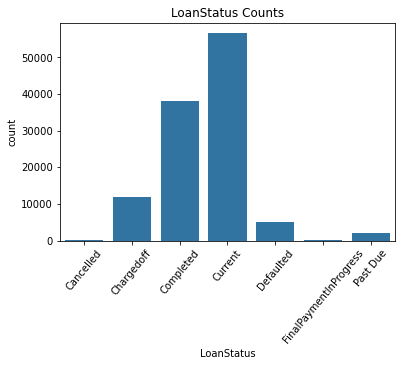

In [52]:
#set base color
base_color = sb.color_palette()[0]
#plot
sb.countplot(data=loan_data2 , x='LoanStatus' , color = base_color)
plt.xticks(rotation=50)
plt.title('LoanStatus Counts');

>Most loans fall in `Current` or `Completed` Categories, there are over 10,000 loans `ChargedOff` and around 5,000 loans `Defaulted`.

**What is the count of loans taken by each `EmploymentStatus`?**

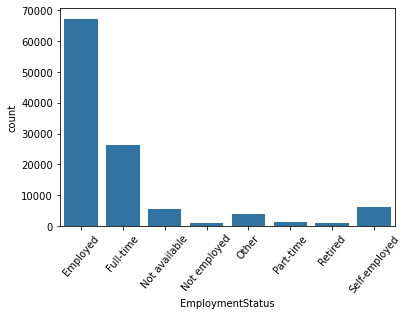

In [53]:
sb.countplot(data=loan_data2 , x='EmploymentStatus' , color = base_color)
plt.xticks(rotation=50);

In [54]:
loan_data2['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

>The majority of loan listed customers are `employed`, and less than 30,000 have `full-time` jobs while around 6,000 customers are `self-employed` and there are very small number of customers that have `part-time` jobs or retired.which means that even `Not employed` customers still have a small chance of recieving a loan from prosper.

**What is the count of loans in each `ProsperScore` category?**

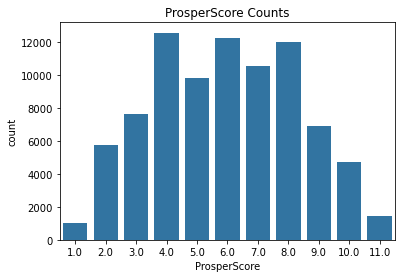

In [55]:
sb.countplot(data=loan_data2 , x='ProsperScore',color = base_color)
plt.title('ProsperScore Counts');

>From the bar chart we can see that approximately 12,000 loans had been listed for customers with score ranges from 4 to 8 , and less than 1,700 customers are scored 1 (lowest) , and around 5,700 customers scored 10 (best). excluding customers with score 11 because scores are supposed to be 1-10 as described in the dataset dictionary.<br>

add something

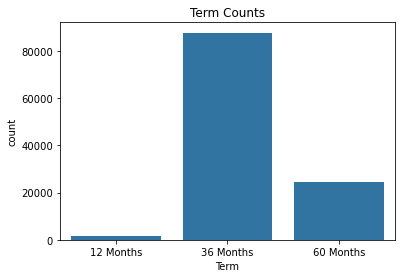

In [56]:
sb.countplot(data=loan_data2 , x='Term' , color=base_color)
plt.xticks([0,1,2],['12 Months' , '36 Months' , '60 Months'])
plt.title('Term Counts');

>Most loans are in terms of 36 months, around 30,000 loans are in terms of 60 months and very few loans with 12 months compared to the rest terms.

**What is the count of `OpenCreditLines` ?**

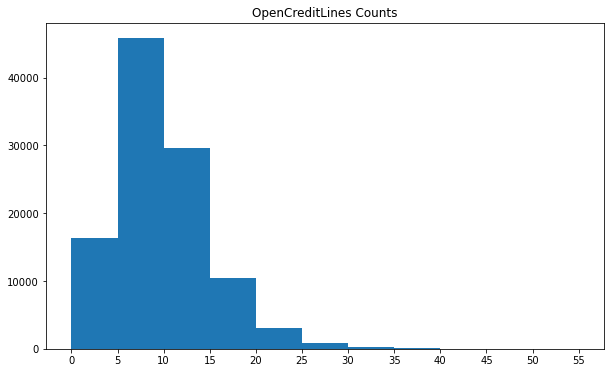

In [57]:
bins = np.arange(0 , loan_data2.OpenCreditLines.max()+5 , 5)
plt.figure(figsize=(10,6))
plt.hist(data=loan_data2 , x='OpenCreditLines',bins=bins)
plt.xticks(np.arange(0 , loan_data2.OpenCreditLines.max()+5 , 5))
plt.title('OpenCreditLines Counts');

>The Majority of customers have 5 open credit lines, around 29,000 customers with 10 open credit lines.

**What is the count of `MonthlyLoanPayment`?**

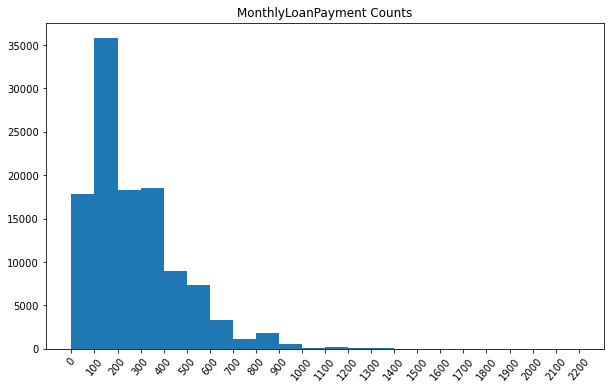

In [58]:
plt.figure(figsize=(10,6))
bins = np.arange(0 , loan_data2.MonthlyLoanPayment.max()+2 ,100)
plt.hist(data=loan_data2 , x='MonthlyLoanPayment' , bins=bins)
plt.xticks(np.arange(0 , loan_data2.MonthlyLoanPayment.max()+2 ,100) , rotation=50)
plt.title('MonthlyLoanPayment Counts');

>Most `MonthlyLoanPayment` are 100 per month , in a few cases it can reach 900 or 1,000 , but the majority pay between 100 to 300 per month.

**What is the count of `IncomeRange`?**

>Since `IncomeRange` is ordinal , i'll order them before plotting

In [59]:
#Order income ranges 
income_ranges = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+' , 'Other']
ranges = pd.api.types.CategoricalDtype(ordered=True, categories=income_ranges)
loan_data2['IncomeRange'] = loan_data2['IncomeRange'].astype(ranges)

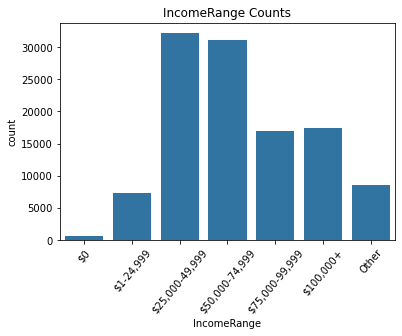

In [60]:
sb.countplot(data=loan_data2, x='IncomeRange' , color=base_color)
plt.xticks(rotation=50)
plt.title('IncomeRange Counts');

>Over 30,000 of loan listed borrowers have the IncomeRange (`$25,000 - $49,999`) or (`$50,000-$74,999`), Seems that customers who earn more are less likely to borrow loans, as well as people who earn less, clearly most borrowers are from the middle class.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> <ol>
    <li>Most loans outcome status are either `Current` or `Completed`.</li>
    <li>The majority of loan borrowers are employed full-time employees in particular.</li>
    <li>From the ProsperScore bar chart it appears that borrowers with prosperScore:`4.0` are more likely to get loans.</li>
    <li>Most loan borrowers prefer 36 months term loans , then 60 months comes in the second place.</li>
    <li>The majority of loan borrowers have from 5 to 10 open credit lines.</li>
    <li>Most borrowers pay 100 per month, some pay up to 300, and very few can pay up to 1000</li>
</ol>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> <ul>
    <li>'LoanStatus' column contained 'Past Due (for multiple periods)' I merged all of them in one category which is 'Past Due' because i'm only interested in wether its Past Due or not for better clear result.</li>
    <li>when investigating 'IncomeRange' I noticed there were categories (Not displayed , Not employed) i found it better to categorise both of them as 'Other' category. furthermore, I noticed that there exists a small number of borrowers with 0 income, I assume its missing data or the borrowers did not provide their real income range.  </li>
    <li>Also, in 'ProsperScore' the bar chart shows that some borrowers are scored 11, the score is supposed to be from 1(worst) to 10 (Best) as described in the dataset dictionary.</li>
</ul>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**How does `IncomeRange` affect the `LoanStatus`?**

In [61]:
loan_data2['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Other              8547
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

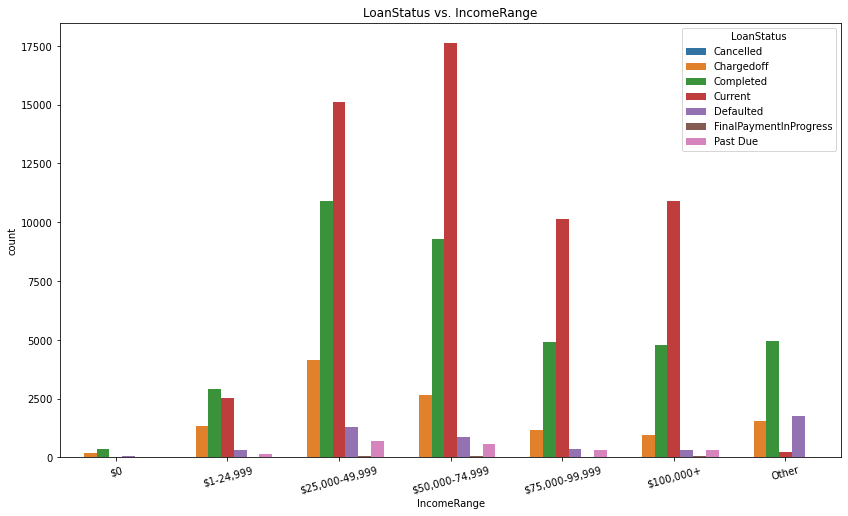

In [62]:
plt.figure(figsize=(14,8))
sb.countplot(data = loan_data2, x = 'IncomeRange', hue = 'LoanStatus')
plt.xticks(rotation=15)
plt.title('LoanStatus vs. IncomeRange');

>This chart shows that `IncomeRange` can affect the `LoanStatus` outcome, As the income range decrease loans with past due incease, loans borrwed by borrwers in the income range (25,000-49,999) have a relatively high past due bar and it decreases as the income range increases.

**What is the relationship between `BorrowerRate` and `LoanStatus`?**

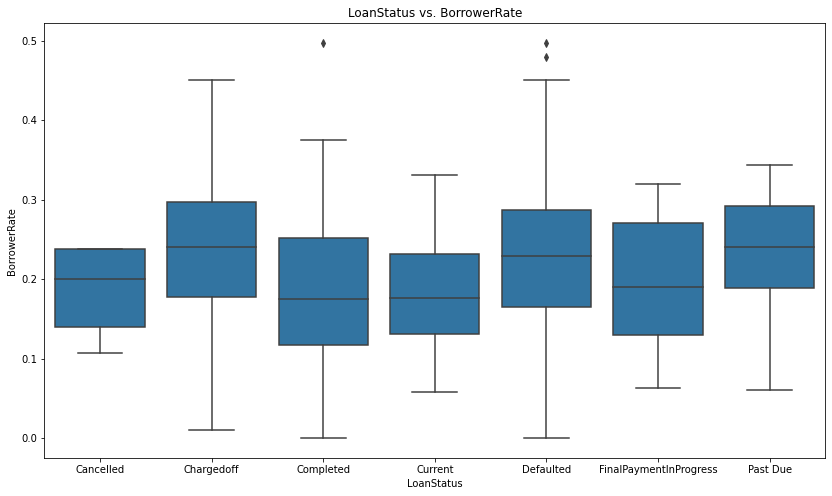

In [63]:
plt.figure(figsize=(14,8))
sb.boxplot(data=loan_data2 , x='LoanStatus' , y='BorrowerRate' , color = base_color)
plt.title('LoanStatus vs. BorrowerRate');

>average `BorrwerRate` increases when the `LoanStatus` is Past Due or Chargedoff.

**How does `LoanOriginalAmount` affect the loan status outcome?**

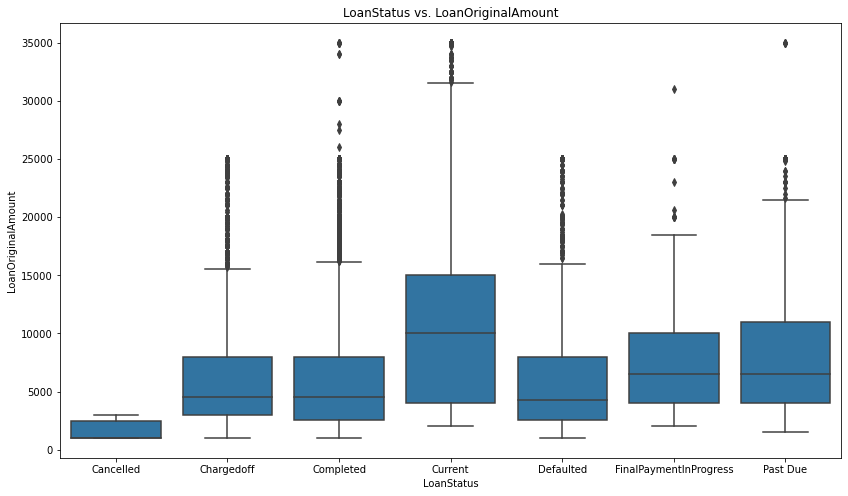

In [64]:
plt.figure(figsize=(14,8))
sb.boxplot(data=loan_data2 , x='LoanStatus' , y='LoanOriginalAmount' , color = base_color)
plt.title('LoanStatus vs. LoanOriginalAmount');

>the box plot shows that the average loan amount for Cancelled loans is approximately 1000, As for Current the average is 10,000, and Completed loans have an average amount of almost 5,000, while Past Due loans average amount is higher than the completed.<br>
yes, `LoanOriginalAmount` might have an affect on the `LoanStatus` outcome.

**Does the number of open credit lines affect the loan status outcome?**

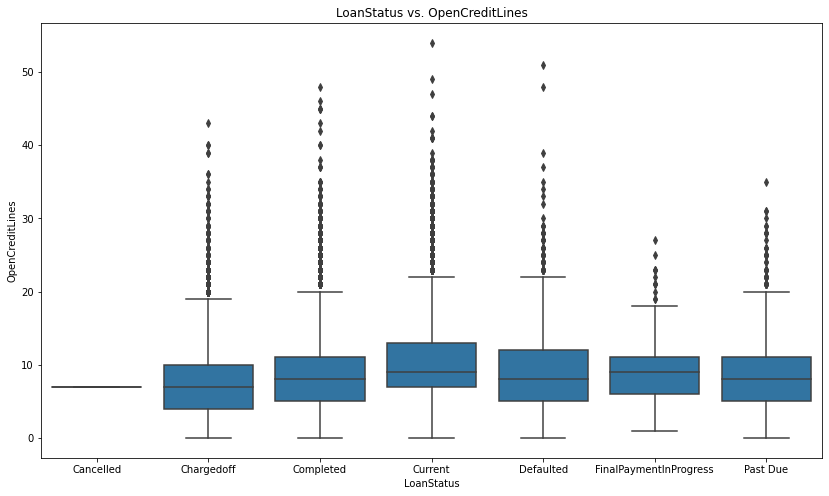

In [65]:
plt.figure(figsize=(14,8))
sb.boxplot(data=loan_data2 , x='LoanStatus' , y='OpenCreditLines' , color = base_color)
plt.title('LoanStatus vs. OpenCreditLines');

>the plot shows that the average `OpenCreditLines` number in all `LoanStatus` outcomes is almost the same, which means `OpenCreditLines` number don't have an affect on the `LoanStatus` outcome.

**What is the relationship between `LoanStatus` and `Term`?**

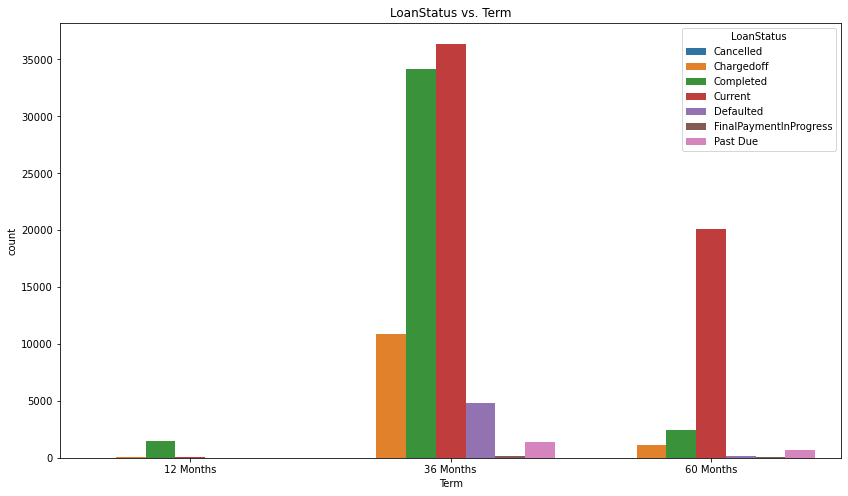

In [66]:
plt.figure(figsize=(14,8))
sb.countplot(data = loan_data2, x = 'Term', hue = 'LoanStatus')
plt.xticks([0,1,2],['12 Months' , '36 Months' , '60 Months'])
plt.title('LoanStatus vs. Term');

>This plot shows that most borrowers prefer loans in terms of 36 Months and its more likely to be completed, considering the difference in time we could assume that the increase in Completed loans in terms of 36 Months is due to the shortness of time borrowers will be able to complete loans faster than 60 Months borrowers which normally caused that increase in Completed LoanStatus outcome for 36 Months and also due to borrowers prefering that term and it has more loans than the other 2 categories, **So `Term` does not play a role in predicting `LoanStatus` outcome.**

**What is the relationship between `LoanStatus` and `TotalProsperPaymentsBilled`?**

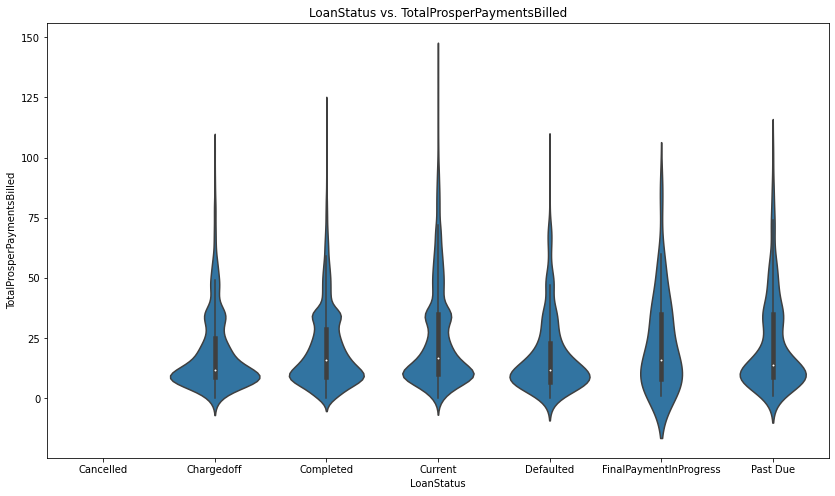

In [67]:
plt.figure(figsize=(14,8))
sb.violinplot(data=loan_data2, x='LoanStatus', y='TotalProsperPaymentsBilled', color=base_color)
plt.title('LoanStatus vs. TotalProsperPaymentsBilled');

>The plot shows that `TotalProsperPaymentsBilled` can predict the `LoanStatus` outcome, Completed loans seems to have total payments, whiel Past Due loans have less total.

**How does `MonthlyLoanPayment` affect the `LoanStatus`?**

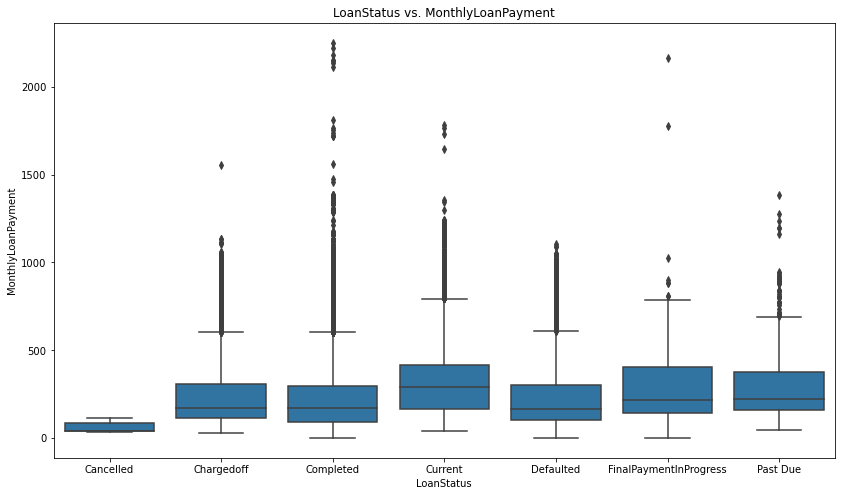

In [68]:
plt.figure(figsize=(14,8))
sb.boxplot(data=loan_data2 , x='LoanStatus' , y='MonthlyLoanPayment' , color = base_color)
plt.title('LoanStatus vs. MonthlyLoanPayment');

>`MonthlyLoanPayment` does have an affect on `LoanStatus`, Past Due loans seems to have more average monthly payment than those that are Completed, So the higher the monthly payment the more likely to be past due.

**What is the relationship between `LoanStatus` and `EmploymentStatus`?**

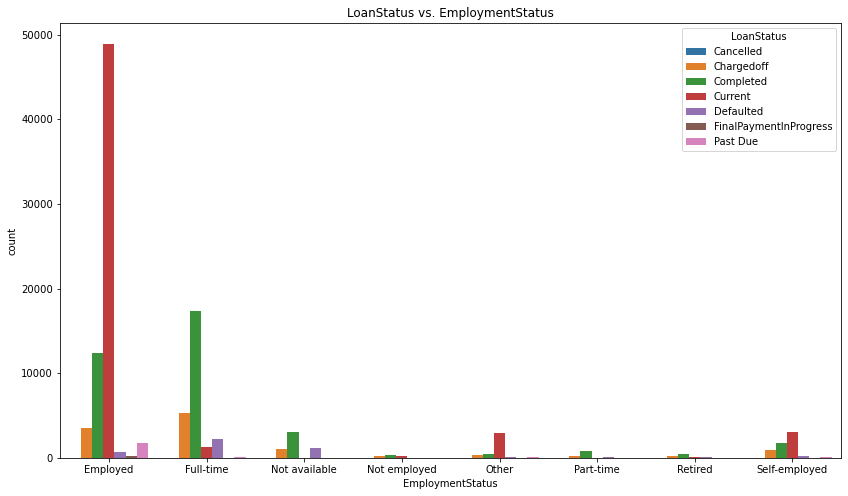

In [69]:
plt.figure(figsize=(14,8))
sb.countplot(data = loan_data2, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.title('LoanStatus vs. EmploymentStatus');

>`EmploymentStatus` does not affect `LoanStatus` outcome.

**What is the relationship between `LoanStatus` and `ProsperScore`?**

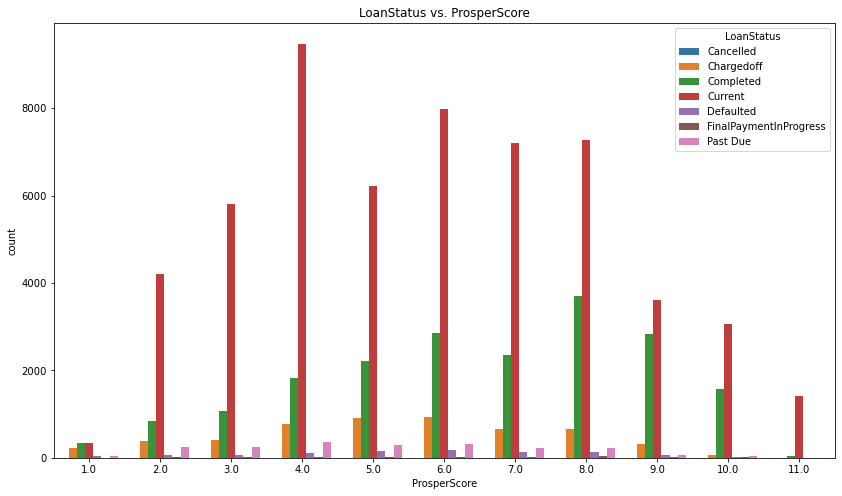

In [70]:
plt.figure(figsize=(14,8))
sb.countplot(data = loan_data2, x = 'ProsperScore', hue = 'LoanStatus')
plt.title('LoanStatus vs. ProsperScore');

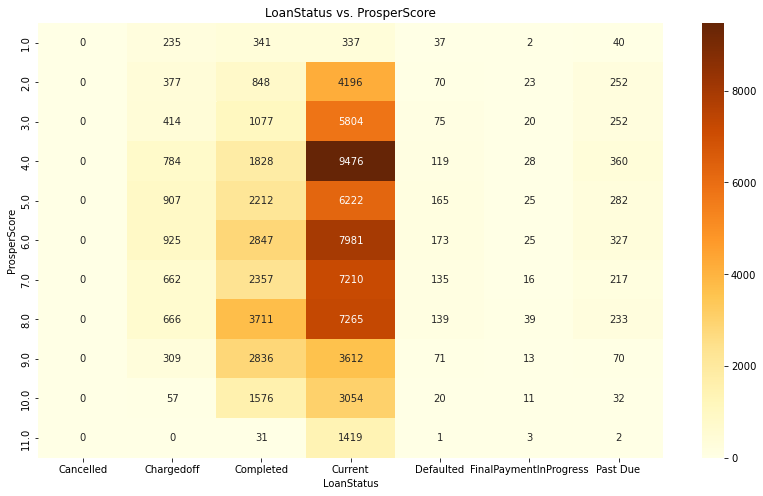

In [71]:
#get the score counts for each score and status and store that into a new dataframe
score_count = loan_data2.groupby(['LoanStatus' , 'ProsperScore']).size()
score_count = score_count.reset_index(name='score_count')
score_count = score_count.pivot(index='ProsperScore' , columns='LoanStatus' , values='score_count')

#plot heatmap
plt.figure(figsize=(14,8))
sb.heatmap(score_count , annot=True , fmt='d' , cmap='YlOrBr')

plt.title('LoanStatus vs. ProsperScore');

>`ProsperScore` seems to have an affect on `LoanStatus`, borrowers with 8.0 score seem to be the most in Completed status, while borrwers with score 4.0 are the most borrowers with current loans, As for Chargedoff loans borrwers with score 6.0 seem to have the most chargedoff loans. 

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

><ol>
    <li>There's a relationship between `IncomeRange` and `LoanStatus` as the income decreases the chance of the loan being past due increases.</li>
    <li>Average BorrowerRate incease when the LoanStatus is past due or chargedoff.</li>
    <li>High `LoanAverageAmount`is more likely to be in Past Due `LoanStatus`.</li>
    <li>`OpenCreditLines` number don't have an affect on the `LoanStatus` outcome.</li>
    <li>`Term` does not play a role in predicting `LoanStatus` outcome.</li>
    <li>`TotalProsperPaymentsBilled` can predict the `LoanStatus` outcome, Completed loans seems to have higher total payments, while Past Due loans have less total.</li>
    <li>The higher the average `LoanMonthlyPayment` the more likely it will result in past due.</li>
    <li>`EmploymentStatus` does not affect `LoanStatus` outcome.</li>
    <li>Borrowers with 8.0 `ProsperScore` seem to be the most in Completed status, while borrwers with score 4.0 are the most borrowers with current loans, As for Chargedoff loans borrwers with score 6.0 seem to have the most chargedoff loans.</li>
</ol>

## Multivariate Exploration

> In this section I'll create plots of three or more variables to investigate the data even
further.

**Explore relationship between `LoanStatus` vs. `BorrowRate` vs. `ProsperScore` vs.`MonthlyLoanPayment`**

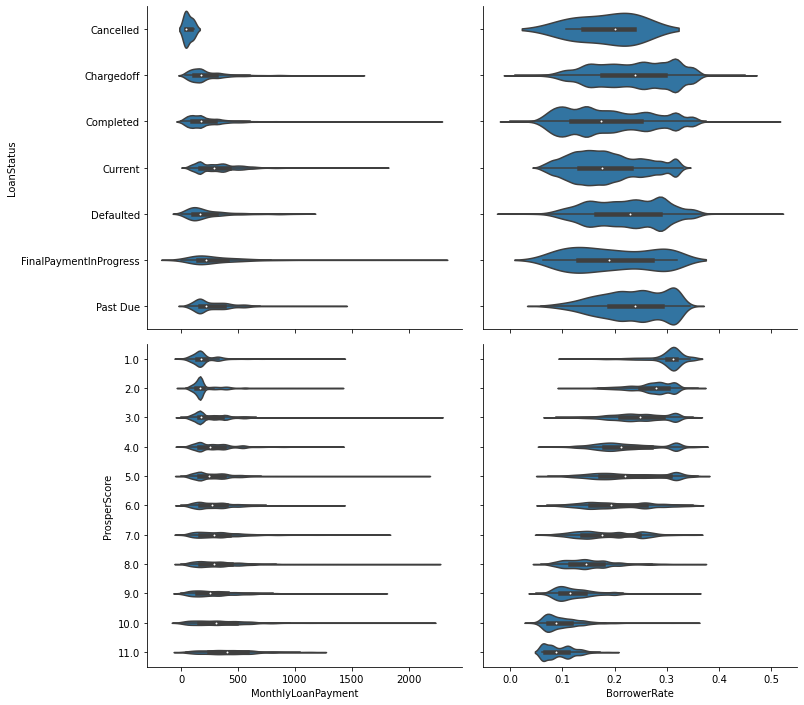

In [72]:
g = sb.PairGrid(data = loan_data2, x_vars = ['MonthlyLoanPayment', 'BorrowerRate'],
                y_vars = ['LoanStatus','ProsperScore'], height = 5, aspect = 1)
g.map(sb.violinplot ,color=base_color);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>The plot above shows the follwing:<br>
><ul>
>    <li>Both MonthlyLoanPayment and BorrowerRate affect on the LoanStatus the same, as the Monthly payment 
increase it is more likely for the loan to be past due. therefore, increases the borrowerRate.</li>
>    <li>Borrwers with high  ProsperScore seem to take loans with higher monthly payments which results for them to be charged less BorrowerRate. </li>
></ul>

## Conclusions
><ul>
    <li>Featurs that affect the LoanStatus outcome are: (MonthlyLoanPayment - BorrowerRate - ProsperScore - LoanAverageAmount - IncomeRange)</li>
    <li>Features that do not have any affect on LoanStatus outcome: (Term - EmploymentStatus - OpenCreditLines)</li>
</ul>
